In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking if null values
df.isnull().sum().max()

0

In [6]:
#Number of Fraud and non Fraud
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
non_fraud_percent=round(df['Class'].value_counts()[0]/len(df)*100,2)
fraud_percent=round(df['Class'].value_counts()[1]/len(df)*100,2)
print('Percent of Non Fraud Transaction:',non_fraud_percent,'%')
print('Percent of Fraud Transaction:',fraud_percent,'%')

Percent of Non Fraud Transaction: 99.83 %
Percent of Fraud Transaction: 0.17 %


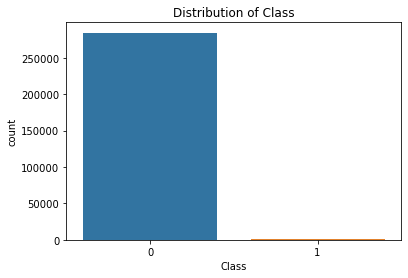

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['Class'])
plt.title('Distribution of Class')
plt.show()

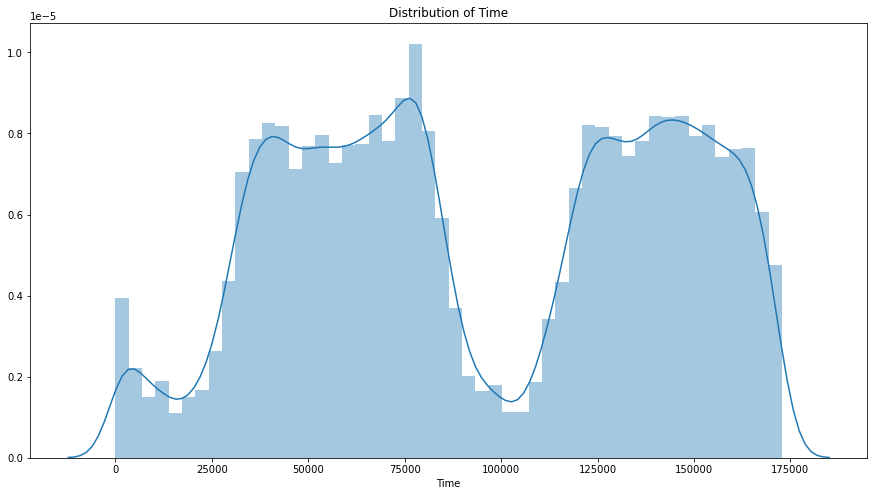

In [9]:
#Since Time and Amount are not scaled 
#We will look into Distribution of Time and Amount 

f,ax=plt.subplots(figsize=(15,8))
sns.distplot(df['Time'])
plt.title('Distribution of Time')
plt.show()

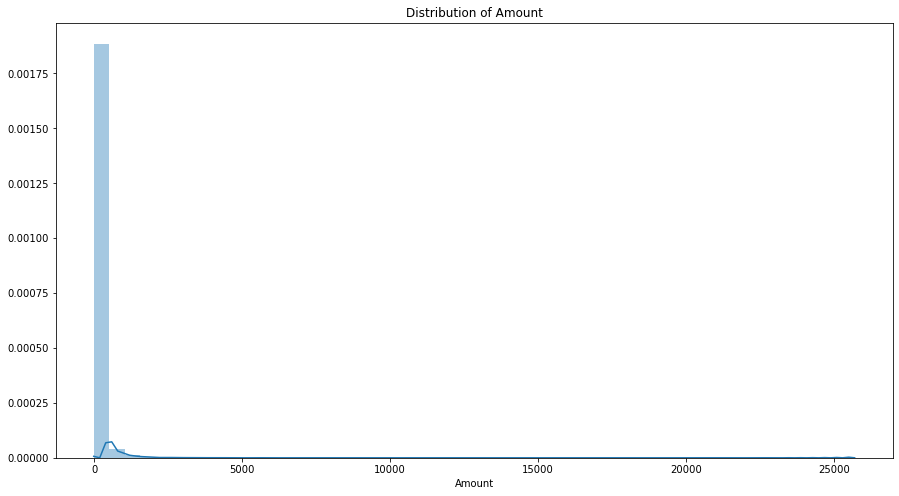

In [10]:
f,ax=plt.subplots(figsize=(15,8))
sns.distplot(df['Amount'])
plt.title('Distribution of Amount')
plt.show()

In [11]:
#scaling Time and Amount Feature 
#RobustScaler scaled data using Inter Quartile Range(IQR) which is less effected by outliers
from sklearn.preprocessing import RobustScaler

rob_scaler=RobustScaler()
df['scaled_amount']=rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


In [13]:
df.drop(['Amount','Time'],axis=1,inplace=True)

In [14]:
#ramdom sampling 
df=df.sample(frac=1)
#making dataset having equal no. of fraud and non fraud transaction 
fraud_df=df.loc[df['Class']==1]
non_fraud_df=df.loc[df['Class']==0][:492]
equal_sample=pd.concat([fraud_df,non_fraud_df] ,axis=0)

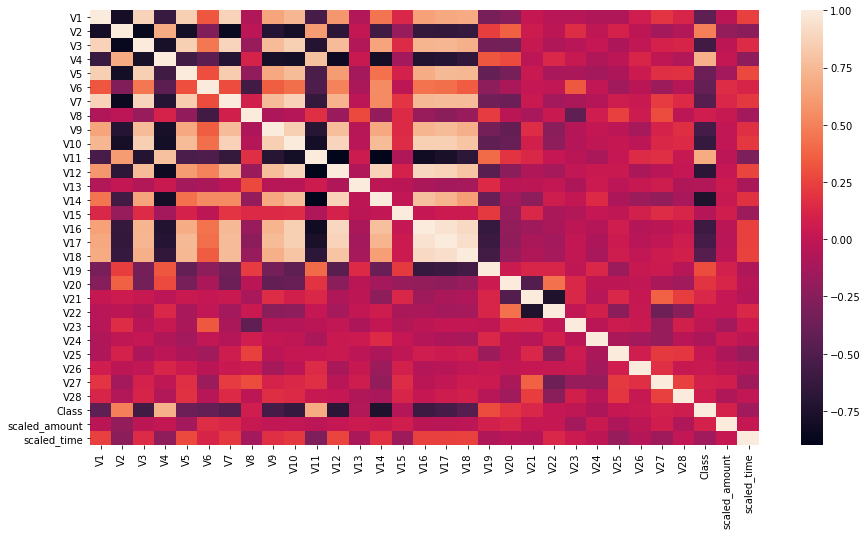

In [15]:
f,_ = plt.subplots(figsize=(15,8))
sns.heatmap(equal_sample.corr())
plt.show()

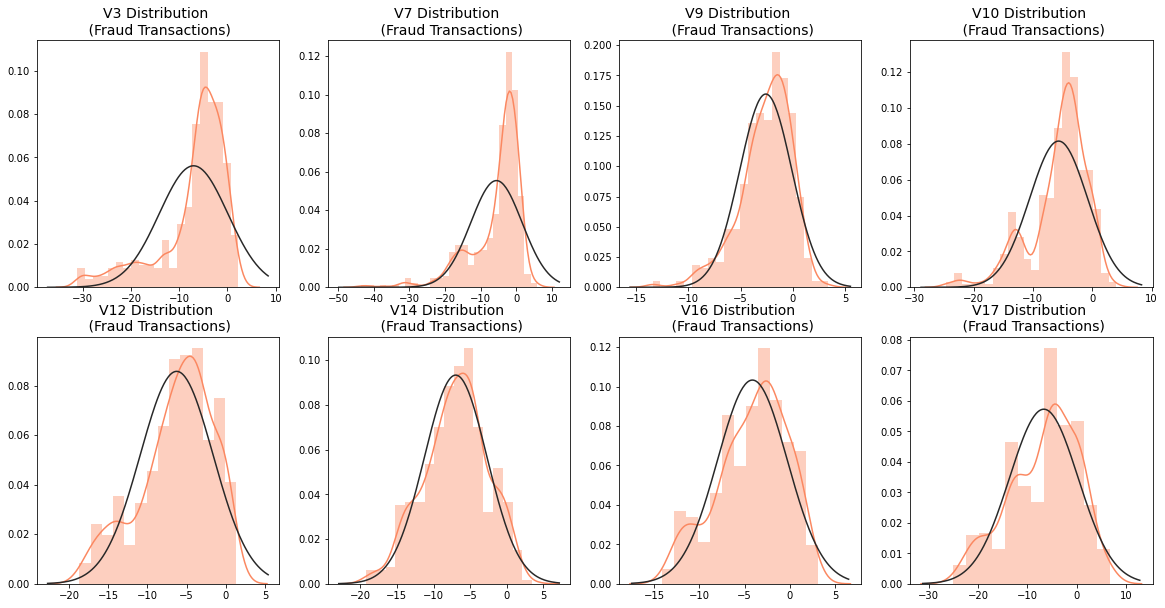

In [16]:
#features having positive correlation with class:V2,V4,V11,V19,V20
#features having negative correlation with class:V1,V3,V7,V9,V10,V12,V14,V16,V17,18

#Let's  go insight into positive and negative correlated features


from scipy.stats import norm
f, axes = plt.subplots(nrows=2,ncols=4, figsize=(20,10))


v3_fraud_dist = equal_sample['V3'].loc[equal_sample['Class'] == 1].values
sns.distplot(v3_fraud_dist,ax=axes[0,0], fit=norm, color='#FB8861')
axes[0,0].set_title('V3 Distribution \n (Fraud Transactions)', fontsize=14)

v7_fraud_dist = equal_sample['V7'].loc[equal_sample['Class'] == 1].values
sns.distplot(v7_fraud_dist,ax=axes[0,1], fit=norm, color='#FB8861')
axes[0,1].set_title('V7 Distribution \n (Fraud Transactions)', fontsize=14)

v9_fraud_dist = equal_sample['V9'].loc[equal_sample['Class'] == 1].values
sns.distplot(v9_fraud_dist,ax=axes[0,2], fit=norm, color='#FB8861')
axes[0,2].set_title('V9 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = equal_sample['V10'].loc[equal_sample['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=axes[0,3], fit=norm, color='#FB8861')
axes[0,3].set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = equal_sample['V12'].loc[equal_sample['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=axes[1,0], fit=norm, color='#FB8861')
axes[1,0].set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v14_fraud_dist = equal_sample['V14'].loc[equal_sample['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=axes[1,1], fit=norm, color='#FB8861')
axes[1,1].set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v16_fraud_dist = equal_sample['V16'].loc[equal_sample['Class'] == 1].values
sns.distplot(v16_fraud_dist,ax=axes[1,2], fit=norm, color='#FB8861')
axes[1,2].set_title('V16 Distribution \n (Fraud Transactions)', fontsize=14)

v17_fraud_dist = equal_sample['V17'].loc[equal_sample['Class'] == 1].values
sns.distplot(v17_fraud_dist,ax=axes[1,3], fit=norm, color='#FB8861')
axes[1,3].set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

#Distribution of V14 looks like normal distribution



Text(0.5, 1.0, 'V18 Distribution \n (Fraud Transactions)')

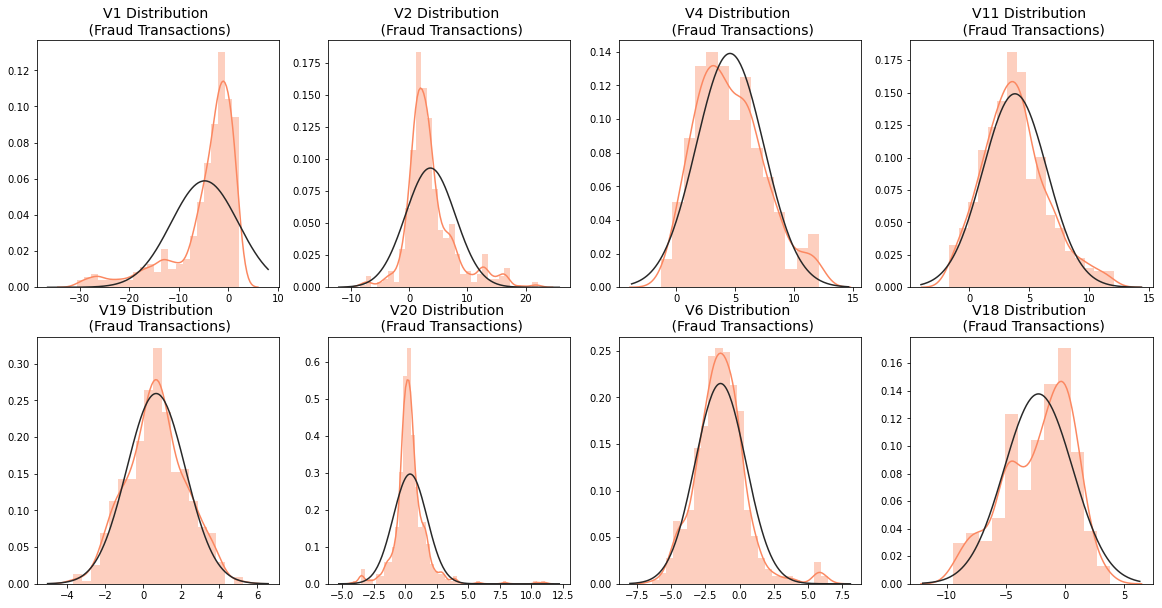

In [17]:
#2.3
#subplots for visualizing large number of features
from scipy.stats import norm
f, axes = plt.subplots(nrows=2,ncols=4, figsize=(20,10))

v1_fraud_dist = equal_sample['V1'].loc[equal_sample['Class'] == 1].values
sns.distplot(v1_fraud_dist,ax=axes[0,0], fit=norm, color='#FB8861')
axes[0,0].set_title('V1 Distribution \n (Fraud Transactions)', fontsize=14)

v2_fraud_dist =equal_sample['V2'].loc[equal_sample['Class'] == 1].values
sns.distplot(v2_fraud_dist,ax=axes[0,1], fit=norm, color='#FB8861')
axes[0,1].set_title('V2 Distribution \n (Fraud Transactions)', fontsize=14)

v4_fraud_dist = equal_sample['V4'].loc[equal_sample['Class'] == 1].values
sns.distplot(v4_fraud_dist,ax=axes[0,2], fit=norm, color='#FB8861')
axes[0,2].set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)

v11_fraud_dist = equal_sample['V11'].loc[equal_sample['Class'] == 1].values
sns.distplot(v11_fraud_dist,ax=axes[0,3], fit=norm, color='#FB8861')
axes[0,3].set_title('V11 Distribution \n (Fraud Transactions)', fontsize=14)

v19_fraud_dist = equal_sample['V19'].loc[equal_sample['Class'] == 1].values
sns.distplot(v19_fraud_dist,ax=axes[1,0], fit=norm, color='#FB8861')
axes[1,0].set_title('V19 Distribution \n (Fraud Transactions)', fontsize=14)

v20_fraud_dist = equal_sample['V20'].loc[equal_sample['Class'] == 1].values
sns.distplot(v20_fraud_dist,ax=axes[1,1], fit=norm, color='#FB8861')
axes[1,1].set_title('V20 Distribution \n (Fraud Transactions)', fontsize=14)

#remaining neagative correlated features

v6_fraud_dist = equal_sample['V6'].loc[equal_sample['Class'] == 1].values
sns.distplot(v6_fraud_dist,ax=axes[1,2], fit=norm, color='#FB8861')
axes[1,2].set_title('V6 Distribution \n (Fraud Transactions)', fontsize=14)

v18_fraud_dist = equal_sample['V18'].loc[equal_sample['Class'] == 1].values
sns.distplot(v18_fraud_dist,ax=axes[1,3], fit=norm, color='#FB8861')
axes[1,3].set_title('V18 Distribution \n (Fraud Transactions)', fontsize=14)


#Distribution of V19 looks like normal distribution

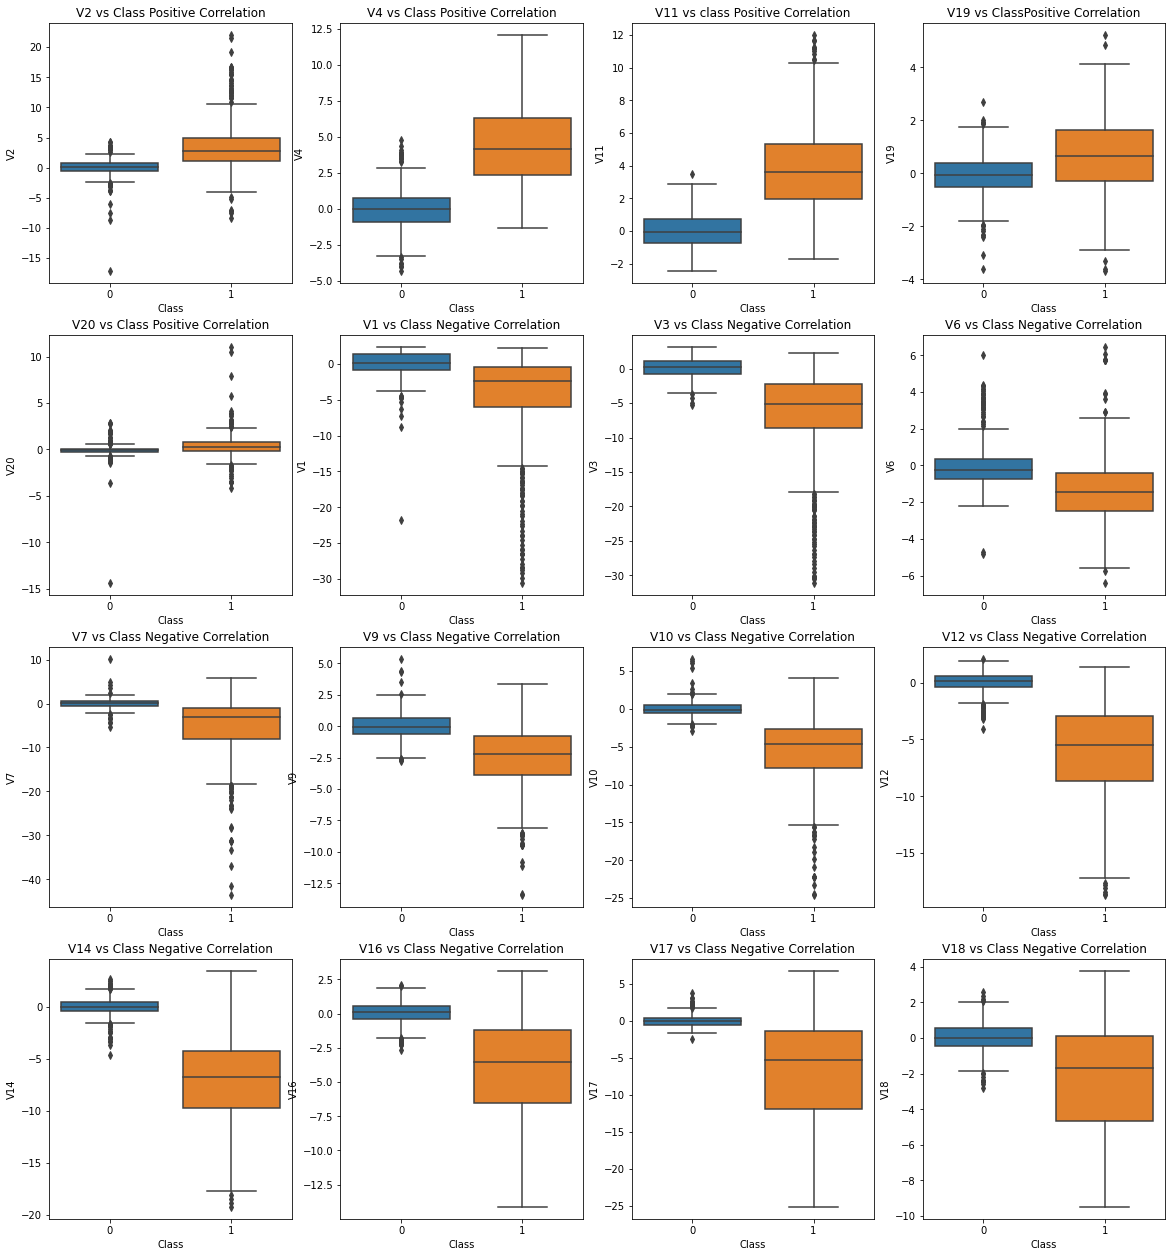

In [18]:
f,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,22))

#class positive correlation 
sns.boxplot(x="Class", y="V2", data=equal_sample, ax=axes[0,0])
axes[0,0].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V4", data=equal_sample, ax=axes[0,1])
axes[0,1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=equal_sample,  ax=axes[0,2])
axes[0,2].set_title('V11 vs class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=equal_sample,  ax=axes[0,3])
axes[0,3].set_title('V19 vs ClassPositive Correlation')

sns.boxplot(x="Class", y="V20", data=equal_sample, ax=axes[1,0])
axes[1,0].set_title('V20 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V1", data=equal_sample, ax=axes[1,1])
axes[1,1].set_title('V1 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V3", data=equal_sample,  ax=axes[1,2])
axes[1,2].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V6", data=equal_sample,  ax=axes[1,3])
axes[1,3].set_title('V6 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V7", data=equal_sample, ax=axes[2,0])
axes[2,0].set_title('V7 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V9", data=equal_sample, ax=axes[2,1])
axes[2,1].set_title('V9 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=equal_sample,  ax=axes[2,2])
axes[2,2].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=equal_sample,  ax=axes[2,3])
axes[2,3].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=equal_sample, ax=axes[3,0])
axes[3,0].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V16", data=equal_sample, ax=axes[3,1])
axes[3,1].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V17", data=equal_sample,  ax=axes[3,2])
axes[3,2].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V18", data=equal_sample,  ax=axes[3,3])
axes[3,3].set_title('V18 vs Class Negative Correlation')

plt.show()

In [19]:
#Removing extream outliers form data 
#There are main three method for removing outliers viz Standard Deivation ,Interquartile Range(IQR) and Automatic outlier detection

#Standard Deivation Method is use when data has Normal/Gaussian Distribution
#IQR method is used for Non-Gaussian Distribution

#We will remove outlier of Feature V19 using Standard Deivation Method and v1,v2,v3,v7,v10,v20 by IQR method 
#Here we remove EXTREAM outliers

#BUT NO outlier is detected by Standard Deivation method in Feature V19
from numpy import mean,std

v19_fraud=equal_sample['V19'].loc[equal_sample['Class']==1].values
v19_mean,v19_std=mean(v19_fraud),std(v19_fraud)
v19_cut_off=v19_std*3
v19_lower,v19_upper=v19_mean - v19_cut_off, v19_mean + v19_cut_off
v19_outliers=[x for x in v19_fraud if x<v19_lower or x>v19_upper]
print('Number of outlier Detected:',len(v19_outliers))





Number of outlier Detected: 0


In [20]:
def remove_outliers(dataframe,feature):
    fraud=dataframe[feature].loc[dataframe['Class']==1].values
    q1,q3=np.percentile(fraud,25),np.percentile(fraud,75)
    IQR=q3-q1
    cut_off=1.5*IQR
    lower,upper=(q1-cut_off),(q3+cut_off)
    outliers=[x for x in fraud if x<lower or x>upper]
    print('For',feature,'feature')
    print('Nuber of outlier Detected:',len(outliers))
    print('Original shape of dataframe:',dataframe.shape)
    #removing outlier form original data 
    dataframe=dataframe.drop(dataframe.loc[((dataframe[feature]>upper) | (dataframe[feature]<lower)) & (dataframe['Class']==1) ].index)
    print('Shape of dataframe after removal of outliers:',dataframe.shape)
    return dataframe



In [21]:
#df=remove_outliers(df,'V4')
#df=remove_outliers(df,'V19')
#df=remove_outliers(df,'V14')
#df=remove_outliers(df,'V11')
#df=remove_outliers(df,'V12')


In [22]:
X=df.drop('Class',axis=1)
y=df['Class']

In [23]:
X=X.values
y=y.values

In [24]:
X.shape

(284807, 30)

In [25]:
#StratifiedKFold preserves relative class frequencies in each train and validation fold
#RepeatedStratitiedKFold repeats StratifiedKFold n times with different randomization in each repetition
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SVMSMOTE
from sklearn.linear_model import LogisticRegression

#defining pipeline
k_values = [ 4, 5, 6, 7]


for k in k_values:
    model=LogisticRegression()
    over=SVMSMOTE(sampling_strategy=0.2, k_neighbors=k)
    under=NearMiss(sampling_strategy=0.6)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    
    #evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    aucs=cross_val_score(pipeline,X,y,scoring='roc_auc',cv=cv,n_jobs=-1)
    print('Value of K:',k)
    print('Mean AUC:',aucs.mean())


Value of K: 4
Mean AUC: 0.966649709641763
Value of K: 5
Mean AUC: 0.9677008441047825
Value of K: 6
Mean AUC: 0.9675347876977859
Value of K: 7
Mean AUC: 0.9686303365296232
